In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
 
a = np.array([1,3,3,4,5,67,12])
print(a)

[ 1  3  3  4  5 67 12]


In [2]:
playerData = pd.read_csv('/home/yash/Downloads/MLPROJECT/playersList.csv')
matchData = pd.read_csv('/home/yash/Downloads/MLPROJECT/training_dataset/DataSet/IPL_Matches_Result_2008_2022.csv')
ballData = pd.read_csv('/home/yash/Downloads/MLPROJECT/training_dataset/DataSet/IPL_Ball_by_Ball_2008_2022.csv')
fiveMatchesData = matchData.head()
# six_over_dataHead = six_over_data.head()

# print(six_over_data.loc[0:5,['ID','innings','overs','ballnumber','total_run','isWicketDelivery']])
                       

In [3]:
six_over_data = pd.DataFrame(columns=["MatchID","Innings","Ball","isWicket","Run_Scored","BattingTeam","Batter",
                                     "Bowler"])
ind = 0
# print((six_over_data['overs']))
# print((six_over_data['overs'].between(0,6)))
for i in range(0,int(len(ballData)/10)):
    if ballData['overs'].between(0,6)[i]:
        six_over_data.loc[ind,'Ball'] = ballData.loc[i,'ballnumber']
        six_over_data.loc[ind,'MatchID'] = ballData.loc[i,'ID']
        six_over_data.loc[ind,'isWicket'] = ballData.loc[i,'isWicketDelivery']
        six_over_data.loc[ind,'Innings'] = ballData.loc[i,'innings']
        six_over_data.loc[ind,'Batter'] = ballData.loc[i,'batter']
        six_over_data.loc[ind,'Bowler'] = ballData.loc[i,'bowler']
        six_over_data.loc[ind,'BattingTeam'] = ballData.loc[i,'BattingTeam']
        six_over_data.loc[ind,'Run_Scored'] = ballData.loc[i,'total_run']
        ind = ind+1
print(six_over_data)

      MatchID Innings Ball isWicket Run_Scored            BattingTeam  \
0     1312200       1    1        0          0       Rajasthan Royals   
1     1312200       1    2        0          1       Rajasthan Royals   
2     1312200       1    3        0          1       Rajasthan Royals   
3     1312200       1    4        0          0       Rajasthan Royals   
4     1312200       1    5        0          0       Rajasthan Royals   
...       ...     ...  ...      ...        ...                    ...   
8118  1254098       1    2        0          1  Kolkata Knight Riders   
8119  1254098       1    3        0          1  Kolkata Knight Riders   
8120  1254098       1    4        0          1  Kolkata Knight Riders   
8121  1254098       1    5        0          0  Kolkata Knight Riders   
8122  1254098       1    6        0          2  Kolkata Knight Riders   

           Batter          Bowler  
0     YBK Jaiswal  Mohammed Shami  
1     YBK Jaiswal  Mohammed Shami  
2      JC Buttl

In [4]:
# score_data = pd.DataFrame(columns = ['MatchID','Team_Batting','Total_Runs','Wickets'])
# # Taking distinct match ID's
# distinct_match_ID = six_over_data['MatchID'].drop_duplicates()
# # Marking matchID's with distinct names
# ind = 0
# for i in range(0,len(distinct_match_ID)):
#     cmatchID = distinct_match_ID.iloc[i]
#     score_data.loc[ind,['MatchID']] = cmatchID
#     ind = ind+1
#     score_data.loc[ind,'MatchID'] = cmatchID
#     ind = ind+1
# for i in range(0,len(six_over_data)):
    

In [5]:
# Finding out scores at end of six overs in all the matches
scoresData = pd.DataFrame(columns=["MatchID","Year","MatchNo","Venue","Score","Innings","Wickets","TeamBatting"])
prevID = -1
mNo = 0
overSum = 0
wicketSum = 0
pos = 0
for i in range(0,len(ballData)):
    currOver = ballData.loc[i,"overs"]
    currInnings = ballData.loc[i,"innings"]
    currID = ballData.loc[i,"ID"]
    if prevID!=currID:
        prevID = currID
        mNo+=1
    if currOver>5:
        pass
    if currOver <= 5:
        overSum = overSum + ballData.loc[i,"total_run"]
        wicketSum = wicketSum + ballData.loc[i,"isWicketDelivery"]
    
    if currOver == 6 and ballData.loc[i,"ballnumber"]==1:
        scoresData.loc[pos,"MatchID"] = ballData.loc[i,"ID"]
        currVenue = matchData["Venue"][matchData["ID"]==currID].astype('string') 
        currMatchNumber = matchData["MatchNumber"][matchData["ID"]==currID].astype('string')
        currSeason = matchData["Season"][matchData["ID"]==currID]
        for matchVenue in currVenue :
            scoresData.loc[pos,"Venue"] = matchVenue
        for matchSeason in currSeason:
            scoresData.loc[pos,"Year"] = (matchSeason)
        for matchNumber in currMatchNumber:
            scoresData.loc[pos,"MatchNo"] = matchNumber

        scoresData.loc[pos,"Score"] = overSum
        scoresData.loc[pos,"Innings"] = currInnings 
        scoresData.loc[pos,"MatchNumber"] = mNo
        scoresData.loc[pos,"Wickets"] = wicketSum
        scoresData.loc[pos,"TeamBatting"] = ballData.loc[i,"BattingTeam"] 
        pos+=1
        overSum = 0
        wicketSum = 0
scoresData.to_csv("Results.csv")

In [6]:
print(scoresData.loc[0:,"Score"].mean())
print((scoresData["Score"][scoresData["TeamBatting"]=="Mumbai Indians"]))
print(scoresData.loc[0:40,"Wickets"].mean())


46.326800847457626
11      27
19      51
31      36
37      37
46      63
        ..
1857    38
1862    27
1869    39
1873    52
1880    47
Name: Score, Length: 230, dtype: object
1.4878048780487805


In [7]:
import matplotlib.pyplot as plt
teamsList = matchData["Team1"].drop_duplicates()
# print(teamsList)
graphData = {}
for team in teamsList:
    graphData[team] = scoresData["Score"][scoresData["TeamBatting"]==team].mean()

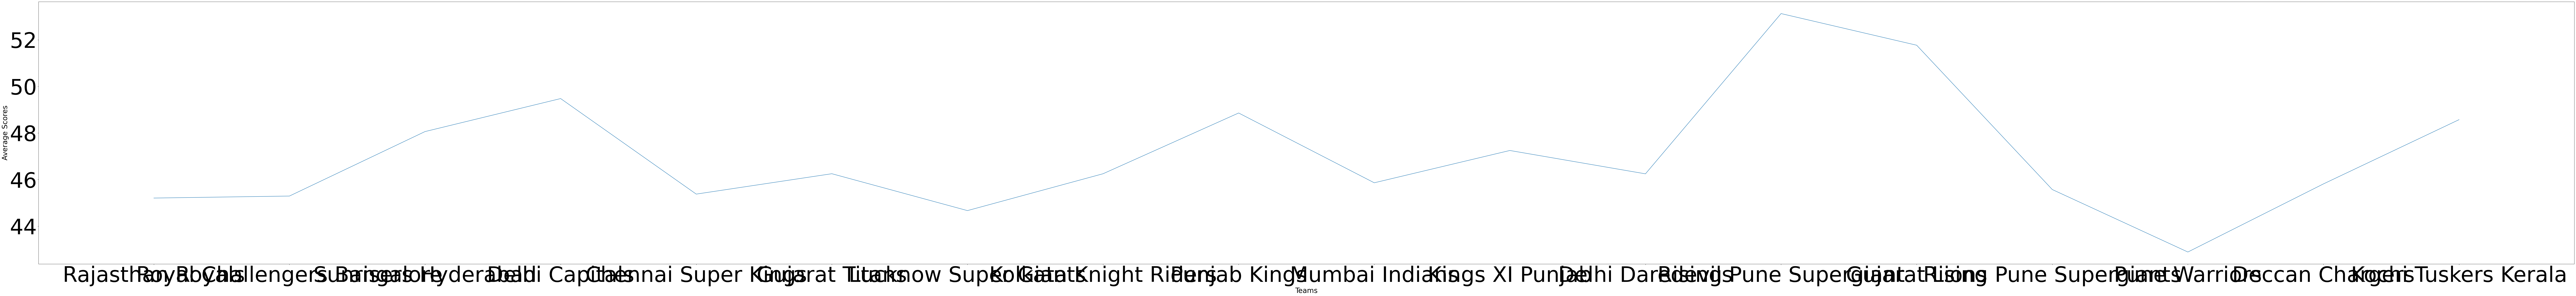

In [11]:
plt.figure(figsize=(192,20))
plt.xlabel("Teams",fontsize=30)
plt.ylabel("Average Scores",fontsize=30)
sizes = np.full(18,2000)
avg = list(graphData.values())
colors = np.array([10,105, 20, 30,35, 40, 45, 50, 55, 60,65, 70,75, 80,85, 90,95, 100])
fsize = 90
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
# plt.scatter(teamsList, avg,s=sizes,c=colors,cmap='viridis')
plt.plot(teamsList, avg)
plt.savefig('teamsAverages.png')
# for i in range(0,len(teamsList)):
#     print(teamsList[i],avg[i])
# plt.colorbar()
plt.show()